In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
con = sqlite3.connect("../../Bootcamp_Repo/Homework/Project 3/FPA_FOD_20210617.sqlite")

cur = con.cursor()

In [3]:
cur.execute('SELECT DISCOVERY_DATE, NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE FROM Fires limit 10')
cur.fetchall()

[('2/2/2005 0:00', 'Human', 'Power generation/transmission/distribution'),
 ('5/12/2004 0:00', 'Natural', 'Natural'),
 ('5/31/2004 0:00', 'Human', 'Debris and open burning'),
 ('6/28/2004 0:00', 'Natural', 'Natural'),
 ('6/28/2004 0:00', 'Natural', 'Natural'),
 ('6/30/2004 0:00', 'Natural', 'Natural'),
 ('7/1/2004 0:00', 'Natural', 'Natural'),
 ('3/8/2005 0:00', 'Human', 'Debris and open burning'),
 ('3/15/2005 0:00', 'Human', 'Debris and open burning'),
 ('7/1/2004 0:00', 'Natural', 'Natural')]

In [4]:
df = pd.read_sql_query('SELECT DISCOVERY_DATE, NWCG_CAUSE_CLASSIFICATION FROM Fires', con).dropna()
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])
df.head()

,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION
0,2005-02-02,Human
1,2004-05-12,Natural
2,2004-05-31,Human
3,2004-06-28,Natural
4,2004-06-28,Natural


In [5]:
df['DISCOVERY_DATE'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).to_julian_date()
df.head()

,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION
0,2453403.5,Human
1,2453137.5,Natural
2,2453156.5,Human
3,2453184.5,Natural
4,2453184.5,Natural


In [6]:
df = pd.DataFrame(df, columns=['DISCOVERY_DATE', 'NWCG_CAUSE_CLASSIFICATION'])
df = df.reset_index(drop=True)
df.sort_values(by="DISCOVERY_DATE", axis=0, ascending=True)
df.head()

,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION
0,2453403.5,Human
1,2453137.5,Natural
2,2453156.5,Human
3,2453184.5,Natural
4,2453184.5,Natural


In [39]:
df.to_csv('actual_causes.csv', index=False)

In [7]:
X = df.drop("NWCG_CAUSE_CLASSIFICATION", axis=1)
y = df["NWCG_CAUSE_CLASSIFICATION"]
print(X.shape, y.shape)

(2166752, 1) (2166752,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7752937730452463
Testing Data Score: 0.7756420670201297


In [12]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human']
First 10 Actual labels: ['Natural', 'Human', 'Human', 'Human', 'Missing data/not specified/undetermined', 'Human', 'Human', 'Human', 'Human', 'Human']


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Human,Natural
1,Human,Human
2,Human,Human
3,Human,Human
4,Human,Missing data/not specified/undetermined
...,...,...
541683,Human,Human
541684,Human,Human
541685,Human,Human
541686,Human,Human


### Testing the General Cause Column (13 categories) Had very low accuracy (25%)

In [14]:
df1 = pd.read_sql_query('SELECT DISCOVERY_DATE, NWCG_GENERAL_CAUSE FROM Fires', con).dropna()
df1['DISCOVERY_DATE'] = pd.to_datetime(df1['DISCOVERY_DATE'])
df1.head()

,DISCOVERY_DATE,NWCG_GENERAL_CAUSE
0,2005-02-02,Power generation/transmission/distribution
1,2004-05-12,Natural
2,2004-05-31,Debris and open burning
3,2004-06-28,Natural
4,2004-06-28,Natural


In [15]:
df1['DISCOVERY_DATE'] = pd.DatetimeIndex(df1['DISCOVERY_DATE']).to_julian_date()
df1.head()

,DISCOVERY_DATE,NWCG_GENERAL_CAUSE
0,2453403.5,Power generation/transmission/distribution
1,2453137.5,Natural
2,2453156.5,Debris and open burning
3,2453184.5,Natural
4,2453184.5,Natural


In [16]:
df1 = pd.DataFrame(df1, columns=['DISCOVERY_DATE', 'NWCG_GENERAL_CAUSE'])
df1 = df1.reset_index(drop=True)
df1.sort_values(by="DISCOVERY_DATE", axis=0, ascending=True)
df1.head()

,DISCOVERY_DATE,NWCG_GENERAL_CAUSE
0,2453403.5,Power generation/transmission/distribution
1,2453137.5,Natural
2,2453156.5,Debris and open burning
3,2453184.5,Natural
4,2453184.5,Natural


In [17]:
X1 = df1.drop("NWCG_GENERAL_CAUSE", axis=1)
y1 = df1["NWCG_GENERAL_CAUSE"]
print(X1.shape, y1.shape)

(2166753, 1) (2166753,)


In [18]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1

LogisticRegression()

In [20]:
classifier1.fit(X1_train, y1_train)

LogisticRegression()

In [21]:
print(f"Training Data Score: {classifier1.score(X1_train, y1_train)}")
print(f"Testing Data Score: {classifier1.score(X1_test, y1_test)}")

Training Data Score: 0.2528349652690602
Testing Data Score: 0.2521096053270419


In [22]:
predictions = classifier1.predict(X1_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y1_test[:10].tolist()}")

First 10 Predictions:   ['Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined'
 'Missing data/not specified/undetermined']
First 10 Actual labels: ['Natural', 'Missing data/not specified/undetermined', 'Debris and open burning', 'Other causes', 'Natural', 'Missing data/not specified/undetermined', 'Missing data/not specified/undetermined', 'Natural', 'Arson/incendiarism', 'Equipment and vehicle use']


In [23]:
pd.DataFrame({"Prediction": predictions, "Actual": y1_test}).reset_index(drop=True)

,Prediction,Actual
0,Missing data/not specified/undetermined,Natural
1,Missing data/not specified/undetermined,Missing data/not specified/undetermined
2,Missing data/not specified/undetermined,Debris and open burning
3,Missing data/not specified/undetermined,Other causes
4,Missing data/not specified/undetermined,Natural
...,...,...
541684,Missing data/not specified/undetermined,Debris and open burning
541685,Missing data/not specified/undetermined,Debris and open burning
541686,Missing data/not specified/undetermined,Missing data/not specified/undetermined
541687,Missing data/not specified/undetermined,Arson/incendiarism


### Comparing actual cause classification data

In [24]:
df_grouped = df.groupby('NWCG_CAUSE_CLASSIFICATION').count()
df_grouped.head(13)

,DISCOVERY_DATE
NWCG_CAUSE_CLASSIFICATION,
Human,1680058
Missing data/not specified/undetermined,173887
Natural,312807


In [25]:
df_grouped = pd.DataFrame(df_grouped, columns=['NWCG_CAUSE_CLASSIFICATION', 'DISCOVERY_DATE'])
df_grouped = df_grouped.drop(['NWCG_CAUSE_CLASSIFICATION'], axis=1)
df_grouped = df_grouped.rename(columns={"DISCOVERY_DATE": "TOTAL_FIRES"})
df_grouped = df_grouped.sort_values(by=['TOTAL_FIRES'], ascending=False)
df_grouped = df_grouped.reset_index()
df_grouped.head(13)

,NWCG_CAUSE_CLASSIFICATION,TOTAL_FIRES
0,Human,1680058
1,Natural,312807
2,Missing data/not specified/undetermined,173887


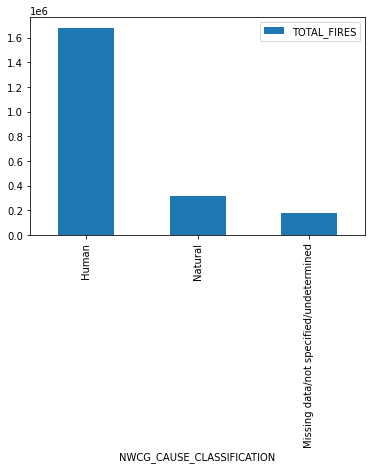

In [26]:
name = df_grouped['NWCG_CAUSE_CLASSIFICATION']
values = df_grouped['TOTAL_FIRES']
cause_plot = df_grouped.plot.bar('NWCG_CAUSE_CLASSIFICATION', 'TOTAL_FIRES')
cause_plot.set_xticklabels(name, rotation=90)
plt.show()

In [30]:
new_dates = pd.read_csv("../../Bootcamp_Repo/Homework/Project 3/2022_dates.csv")
new_dates.head()

,Dates
0,1/4/2022
1,1/11/2022
2,1/16/2022
3,1/25/2022
4,2/15/2022


In [31]:
new_dates['Dates'] = pd.DatetimeIndex(new_dates['Dates']).to_julian_date()
new_dates.head()

,Dates
0,2459583.5
1,2459590.5
2,2459595.5
3,2459604.5
4,2459625.5


In [32]:
Xnew = new_dates
# make a prediction
ynew = classifier.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

X=        Dates
0   2459583.5
1   2459590.5
2   2459595.5
3   2459604.5
4   2459625.5
..        ...
95  2459885.5
96  2459909.5
97  2459922.5
98  2459929.5
99  2459934.5

[100 rows x 1 columns], Predicted=['Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human'
 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 'Human' 

In [38]:
predicted_cause = pd.DataFrame({"Date": Xnew['Dates'], "Prediction": ynew}).reset_index(drop=True)
predicted_cause.to_csv('predicted_cause.csv', index = False)